In [80]:
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import re
import seaborn as sns
import string
from collections import Counter
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ruslanishakov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ruslanishakov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ruslanishakov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ruslanishakov/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
df = pd.read_csv('dataset/llm/train_essays.csv')
df.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [7]:
df_prompts = pd.read_csv('dataset/llm/train_prompts.csv')
df_prompts

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [145]:
df_palm = pd.read_csv('dataset/llm/LLM_generated_essay_PaLM.csv')
df_palm

,id,prompt_id,text,generated
0,0,0.00,## The Advantages of Limiting Car Usage\n\nIn ...,1.00
1,1,0.00,"The United States is a car-dependent nation, w...",1.00
2,2,0.00,"In recent years, there has been a growing move...",1.00
3,3,0.00,"In recent years, there has been a growing move...",1.00
4,4,0.00,"In the past few decades, the United States has...",1.00
...,...,...,...,...
1379,1379,1.00,"Dear Senator,\n\nI am writing to you today to ...",1.00
1380,1380,1.00,"Dear Senator,\n\nI am writing to you today to ...",1.00
1381,1381,1.00,"Dear Senator,\n\nI am writing to you today to ...",1.00
1382,1382,1.00,"Dear Senator,\n\nI am writing to you today to ...",1.00


In [157]:
df_full = pd.concat([df, df_palm], ignore_index=True)
df_full

,id,prompt_id,text,generated,BoW_raw,text_length,average_word_length,text_sent_length,BoW_lemmatized,tokens_num,mean_sentence_length_chars,mean_sentence_length_words
0,0059830c,0,Cars. Cars have been around since they became ...,0,"[cars, cars, around, since, became, famous, 19...",337.00,5.70,23.00,"[car, car, around, since, became, famous, 1900...",337.00,141.91,25.39
1,005db917,0,Transportation is a large necessity in most co...,0,"[transportation, large, necessity, countries, ...",277.00,6.22,27.00,"[transportation, large, necessity, country, wo...",277.00,100.30,17.11
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,"[america, love, affair, vehicles, seems, cooli...",441.00,6.25,48.00,"[america, love, affair, vehicle, seems, coolin...",441.00,91.19,15.50
3,00940276,0,How often do you ride in a car? Do you drive a...,0,"[how, often, ride, car, do, drive, one, motor,...",413.00,5.88,47.00,"[how, often, ride, car, do, drive, one, motor,...",413.00,84.36,14.60
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0,"[cars, wonderful, thing, they, perhaps, one, w...",511.00,5.45,50.00,"[car, wonderful, thing, they, perhaps, one, wo...",511.00,92.92,17.42
...,...,...,...,...,...,...,...,...,...,...,...,...
2757,1379,1,"Dear Senator,\n\nI am writing to you today to ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2758,1380,1,"Dear Senator,\n\nI am writing to you today to ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2759,1381,1,"Dear Senator,\n\nI am writing to you today to ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2760,1382,1,"Dear Senator,\n\nI am writing to you today to ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# dataset comprises of 1375 human-written texts, only 3 ai-generated
df['generated'].value_counts()

0    1375
1       3
Name: generated, dtype: int64

In [158]:
df_full['generated'].value_counts()

1    1387
0    1375
Name: generated, dtype: int64

In [5]:
df['prompt_id'].value_counts()

0    708
1    670
Name: prompt_id, dtype: int64

In [162]:
df_full['prompt_id'].value_counts()

0    1420
1    1342
Name: prompt_id, dtype: int64

In [164]:
df.isnull().any()

id                            False
prompt_id                     False
text                          False
generated                     False
BoW_raw                       False
text_length                   False
average_word_length           False
text_sent_length              False
BoW_lemmatized                False
tokens_num                    False
mean_sentence_length_chars    False
mean_sentence_length_words    False
dtype: bool

In [166]:
df_full.isnull().any()

id                            False
prompt_id                     False
text                          False
generated                     False
BoW_raw                        True
text_length                    True
average_word_length            True
text_sent_length               True
BoW_lemmatized                 True
tokens_num                     True
mean_sentence_length_chars     True
mean_sentence_length_words     True
dtype: bool

In [243]:
def tokenize_and_clean_text(text):
    tokens = tokenize.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    punct_chars = string.punctuation + "'s" + '""' + '...' + "''" + '``'
    filtered_tokens = [word.lower() for word in tokens if word not in stop_words and word not in punct_chars]
    return filtered_tokens

def lemmatize(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def get_mean_sent_char_length(sent_tokens):
    return np.mean([len(sent) for sent in sent_tokens])

def get_mean_sent_word_length(sent_tokens):
    return np.mean([len(sent.split()) for sent in sent_tokens])

def new_lines_quantity(text):
    pattern = r'(\n)'
    matches = re.findall(pattern, text)
    return len(matches)

In [173]:
df_full['BoW_raw'] = df_full['text'].apply(tokenize_and_clean_text)

In [174]:
df_full['text_length'] = df_full['BoW_raw'].apply(lambda x: len(x))

In [175]:
df_full['average_word_length'] = df_full['BoW_raw'].apply(lambda x: np.mean([len(word) for word in x if word.isalpha()]))

In [171]:
pd.options.display.float_format = '{:,.2f}'.format

In [178]:
print(df_full['text_length'].min())
print(df_full['text_length'].max())
print(df_full['text_length'].mean())

109
925
269.41926140477915


In [180]:
df_full['text_sent_length'] = df_full['text'].apply(tokenize.sent_tokenize).apply(len)

In [181]:
df_full['mean_sentence_length_chars'] = df_full['text'].apply(tokenize.sent_tokenize).apply(get_mean_sent_char_length)

In [182]:
df_full['mean_sentence_length_words'] = df_full['text'].apply(tokenize.sent_tokenize).apply(get_mean_sent_word_length)

In [186]:
df_full['BoW_lemmatized'] = df_full['BoW_raw'].apply(lemmatize)

In [190]:
df_full['tokens_num'] = df_full['BoW_lemmatized'].apply(len).astype('int16')

In [216]:
df_full['unique_words'] = df_full['BoW_raw'].apply(lambda x: len(set(x)))
df_full['unique_ratio'] = df_full['unique_words'] / df_full['BoW_raw'].apply(len)

In [244]:
df_full['new_lines_quant'] = df_full['text'].apply(new_lines_quantity)

In [192]:
df_full.head()

,id,prompt_id,text,generated,BoW_raw,text_length,average_word_length,text_sent_length,BoW_lemmatized,tokens_num,mean_sentence_length_chars,mean_sentence_length_words
0,0059830c,0,Cars. Cars have been around since they became ...,0,"[cars, cars, around, since, became, famous, 19...",337,5.70,23,"[car, car, around, since, became, famous, 1900...",337,141.91,25.39
1,005db917,0,Transportation is a large necessity in most co...,0,"[transportation, large, necessity, countries, ...",277,6.22,27,"[transportation, large, necessity, country, wo...",277,100.30,17.11
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,"[america, love, affair, vehicles, seems, cooli...",441,6.25,48,"[america, love, affair, vehicle, seems, coolin...",441,91.19,15.50
3,00940276,0,How often do you ride in a car? Do you drive a...,0,"[how, often, ride, car, do, drive, one, motor,...",413,5.88,47,"[how, often, ride, car, do, drive, one, motor,...",413,84.36,14.60
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0,"[cars, wonderful, thing, they, perhaps, one, w...",511,5.45,50,"[car, wonderful, thing, they, perhaps, one, wo...",511,92.92,17.42


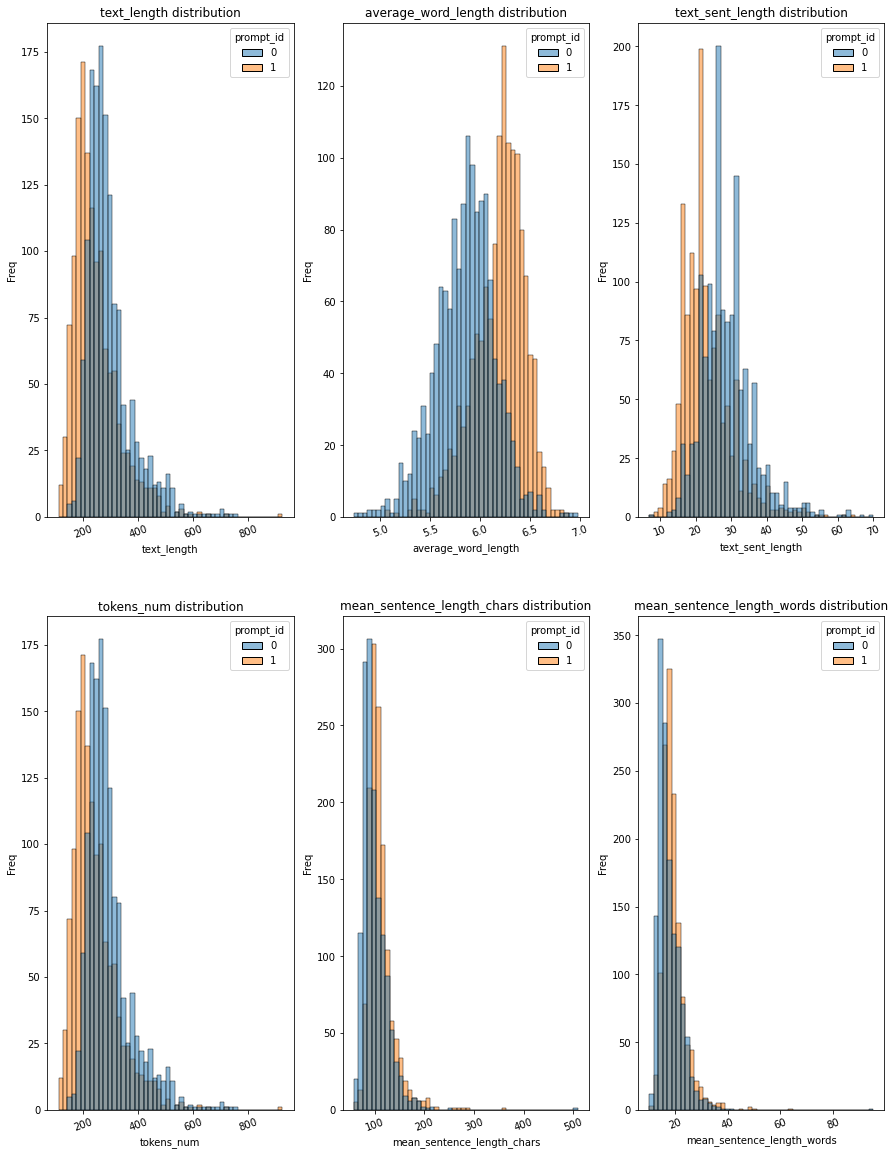

In [195]:
num_cols = df_full[['text_length', 'average_word_length', 'text_sent_length', 'tokens_num', 'mean_sentence_length_chars', 'mean_sentence_length_words']].columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 20))
for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(data=df_full, x=df_full[col], hue='prompt_id', ax=ax, bins=50)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Freq')
    ax.tick_params(axis='x', labelrotation=20)

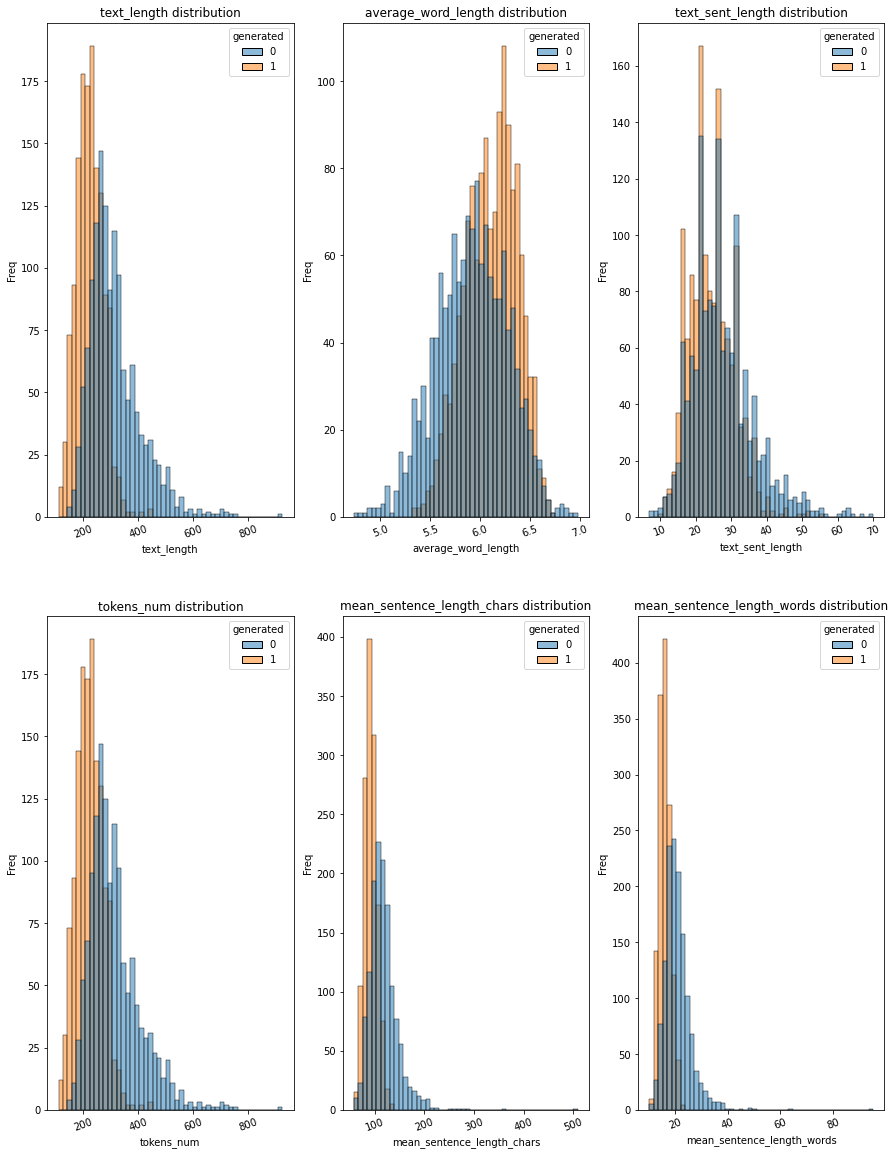

In [196]:
num_cols = df_full[['text_length', 'average_word_length', 'text_sent_length', 'tokens_num', 'mean_sentence_length_chars', 'mean_sentence_length_words']].columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 20))
for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(data=df_full, x=df_full[col], hue='generated', ax=ax, bins=50)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Freq')
    ax.tick_params(axis='x', labelrotation=20)

In [197]:
cnt = Counter()
df_full['BoW_raw'].apply(lambda x: ''.join(x)).apply(cnt.update)
cnt

Counter({'c': 201063,
         'a': 342970,
         'r': 290953,
         's': 308312,
         'o': 304039,
         'u': 132493,
         'n': 290013,
         'd': 137960,
         'i': 330486,
         'e': 605239,
         'b': 51511,
         'm': 110649,
         'f': 52955,
         '1': 4052,
         '9': 1200,
         '0': 7282,
         'h': 95767,
         'y': 73428,
         't': 352389,
         'l': 262371,
         'p': 134586,
         'j': 5016,
         'v': 72923,
         'g': 126296,
         'q': 3264,
         'w': 57390,
         'k': 32140,
         'z': 2565,
         'x': 7537,
         '2': 4048,
         '5': 2076,
         '3': 2163,
         '7': 1334,
         "'": 4256,
         '6': 1772,
         '.': 1916,
         '4': 976,
         '8': 1059,
         ',': 756,
         ':': 21,
         '_': 16,
         '-': 955,
         '/': 10,
         '—': 2,
         '“': 3,
         '”': 3})

In [198]:
cnt_lemm = Counter()
df_full['BoW_lemmatized'].apply(cnt_lemm.update)
lemm_unigramms = cnt_lemm.most_common()
lemm_unigramms

[('car', 23984),
 ('vote', 15241),
 ('electoral', 13853),
 ('state', 11803),
 ('college', 11557),
 ('people', 10963),
 ('usage', 9719),
 ('the', 7563),
 ('this', 6710),
 ('limiting', 6636),
 ('president', 6604),
 ('would', 6234),
 ('popular', 5775),
 ('in', 5671),
 ('also', 5168),
 ('way', 4707),
 ('election', 4693),
 ('i', 4683),
 ('candidate', 4618),
 ('help', 4606),
 ('make', 4307),
 ('pollution', 4218),
 ('many', 4196),
 ('one', 4174),
 ('air', 4159),
 ('reduce', 4009),
 ('time', 4005),
 ('get', 3912),
 ('number', 3836),
 ('system', 3782),
 ('voter', 3718),
 ('transportation', 3537),
 ('it', 3428),
 ('city', 3403),
 ('elector', 3309),
 ('traffic', 3272),
 ('public', 3032),
 ('driving', 3015),
 ("n't", 3011),
 ('health', 2841),
 ('le', 2825),
 ('source', 2751),
 ('gas', 2657),
 ('united', 2597),
 ('money', 2596),
 ('advantage', 2582),
 ('even', 2481),
 ('environment', 2419),
 ('improve', 2397),
 ('take', 2384),
 ('congestion', 2378),
 ('limit', 2367),
 ('there', 2299),
 ('problem', 

In [199]:
cnt_lemm.most_common(20)

[('car', 23984),
 ('vote', 15241),
 ('electoral', 13853),
 ('state', 11803),
 ('college', 11557),
 ('people', 10963),
 ('usage', 9719),
 ('the', 7563),
 ('this', 6710),
 ('limiting', 6636),
 ('president', 6604),
 ('would', 6234),
 ('popular', 5775),
 ('in', 5671),
 ('also', 5168),
 ('way', 4707),
 ('election', 4693),
 ('i', 4683),
 ('candidate', 4618),
 ('help', 4606)]

In [200]:
unigrams = {key: value for key, value in lemm_unigramms}
unigrams

{'car': 23984,
 'vote': 15241,
 'electoral': 13853,
 'state': 11803,
 'college': 11557,
 'people': 10963,
 'usage': 9719,
 'the': 7563,
 'this': 6710,
 'limiting': 6636,
 'president': 6604,
 'would': 6234,
 'popular': 5775,
 'in': 5671,
 'also': 5168,
 'way': 4707,
 'election': 4693,
 'i': 4683,
 'candidate': 4618,
 'help': 4606,
 'make': 4307,
 'pollution': 4218,
 'many': 4196,
 'one': 4174,
 'air': 4159,
 'reduce': 4009,
 'time': 4005,
 'get': 3912,
 'number': 3836,
 'system': 3782,
 'voter': 3718,
 'transportation': 3537,
 'it': 3428,
 'city': 3403,
 'elector': 3309,
 'traffic': 3272,
 'public': 3032,
 'driving': 3015,
 "n't": 3011,
 'health': 2841,
 'le': 2825,
 'source': 2751,
 'gas': 2657,
 'united': 2597,
 'money': 2596,
 'advantage': 2582,
 'even': 2481,
 'environment': 2419,
 'improve': 2397,
 'take': 2384,
 'congestion': 2378,
 'limit': 2367,
 'there': 2299,
 'problem': 2259,
 'day': 2201,
 'much': 2199,
 'if': 2197,
 'use': 2130,
 'country': 2096,
 'save': 2079,
 'win': 2067

In [201]:
def get_words_as_text(tokens):
    return ' '.join(tokens)

In [202]:
words = df_full['BoW_raw'].apply(get_words_as_text)
words_as_texts = ' '.join(words)
all_words = words_as_texts.split()

In [203]:
bigrams = nltk.ngrams(all_words, 2)
cnt_bigrams = Counter(bigrams)
bigr = cnt_bigrams.most_common()

In [204]:
bigrams_freq = {' '.join(key): value for key, value in bigr}
bigrams_freq

{'electoral college': 11203,
 'car usage': 9253,
 'limiting car': 6212,
 'popular vote': 5191,
 'the electoral': 2821,
 'united states': 2552,
 'public transportation': 2211,
 'limit car': 2035,
 'air pollution': 1973,
 'traffic congestion': 1928,
 'electoral votes': 1832,
 'help reduce': 1788,
 'usage help': 1512,
 'save money': 1344,
 'advantages limiting': 1265,
 'walk bike': 1244,
 'i believe': 1083,
 'reduce traffic': 997,
 'get around': 981,
 'abolishing electoral': 964,
 'president united': 939,
 'this means': 867,
 'electing president': 843,
 'elect president': 842,
 'major source': 828,
 'support abolishing': 827,
 'air quality': 818,
 'greenhouse gas': 794,
 'senator i': 786,
 'take public': 786,
 'vote president': 778,
 'cars major': 769,
 'dear senator': 764,
 'swing states': 746,
 'many people': 737,
 'improve air': 737,
 'in addition': 736,
 'college system': 735,
 'small states': 734,
 'gas emissions': 726,
 'there number': 715,
 'there many': 701,
 'climate change': 699

In [205]:
trigrams = nltk.ngrams(all_words, 3)
cnt_trigrams = Counter(trigrams)
trigr = cnt_trigrams.most_common()

In [206]:
trigrams_freq = {' '.join(key): value for key, value in trigr}
trigrams_freq

{'limiting car usage': 6072,
 'the electoral college': 2739,
 'limit car usage': 2009,
 'car usage help': 1509,
 'advantages limiting car': 1235,
 'reduce traffic congestion': 976,
 'abolishing electoral college': 960,
 'president united states': 937,
 'support abolishing electoral': 826,
 'usage help reduce': 771,
 'take public transportation': 750,
 'improve air quality': 736,
 'electoral college system': 729,
 'cars major source': 698,
 'dear senator i': 697,
 'senator i writing': 678,
 'president popular vote': 674,
 'i writing today': 665,
 'sincerely your name': 662,
 'your name dear': 662,
 'greenhouse gas emissions': 659,
 'writing today express': 653,
 'electoral college electing': 649,
 'college electing president': 647,
 'name dear senator': 647,
 'i urge support': 616,
 'car usage also': 602,
 'states popular vote': 579,
 'help reduce traffic': 573,
 'united states popular': 572,
 'popular vote this': 562,
 'electoral college outdated': 559,
 'car usage one': 530,
 'believe

In [207]:
def get_pos(tokens):
    return [tag for word, tag in nltk.pos_tag(tokens, lang='eng')]

In [208]:
cnt_pos = Counter()
df_full['BoW_raw'].apply(get_pos).apply(cnt_pos.update)
pos_count = cnt_pos.most_common()
pos_count

[('NN', 239452),
 ('JJ', 120084),
 ('NNS', 92717),
 ('RB', 41495),
 ('VBP', 41259),
 ('VBG', 38105),
 ('VB', 27557),
 ('IN', 25925),
 ('DT', 19382),
 ('VBD', 17365),
 ('CD', 16788),
 ('VBZ', 14876),
 ('MD', 11040),
 ('VBN', 10599),
 ('PRP', 8002),
 ('JJR', 6509),
 ('RBR', 2990),
 ('WRB', 2428),
 ('JJS', 1522),
 ('CC', 1469),
 ('PRP$', 1077),
 ('EX', 1010),
 ('RP', 517),
 ('TO', 479),
 ('WP', 427),
 ('WDT', 348),
 ('FW', 219),
 ('RBS', 144),
 ('NNP', 132),
 ('PDT', 62),
 ('POS', 54),
 ('NNPS', 27),
 ('$', 26),
 ('WP$', 23),
 ('UH', 20),
 ('SYM', 6),
 ("''", 1)]

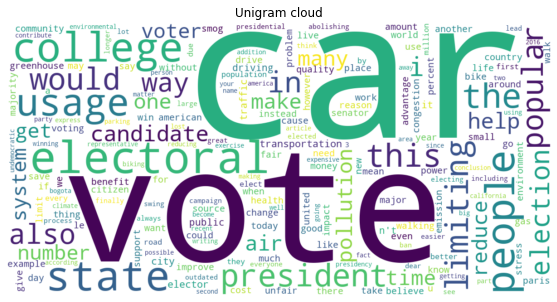

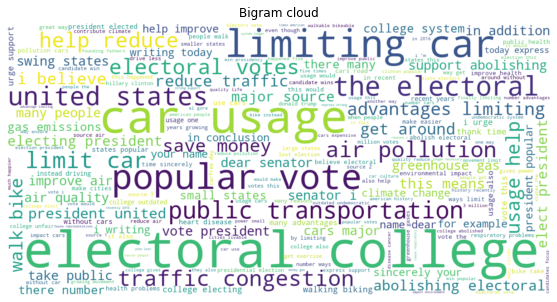

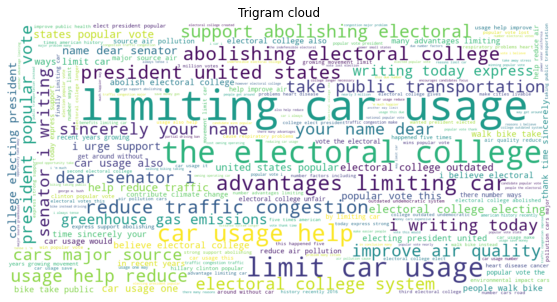

In [209]:
frequencies = unigrams, bigrams_freq, trigrams_freq
for feature in frequencies:
    wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(feature)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    if feature == unigrams:
        plt.title('Unigram cloud')
    elif feature == bigrams_freq:
        plt.title('Bigram cloud')
    else:
        plt.title('Trigram cloud')
    plt.axis('off')
    plt.show()

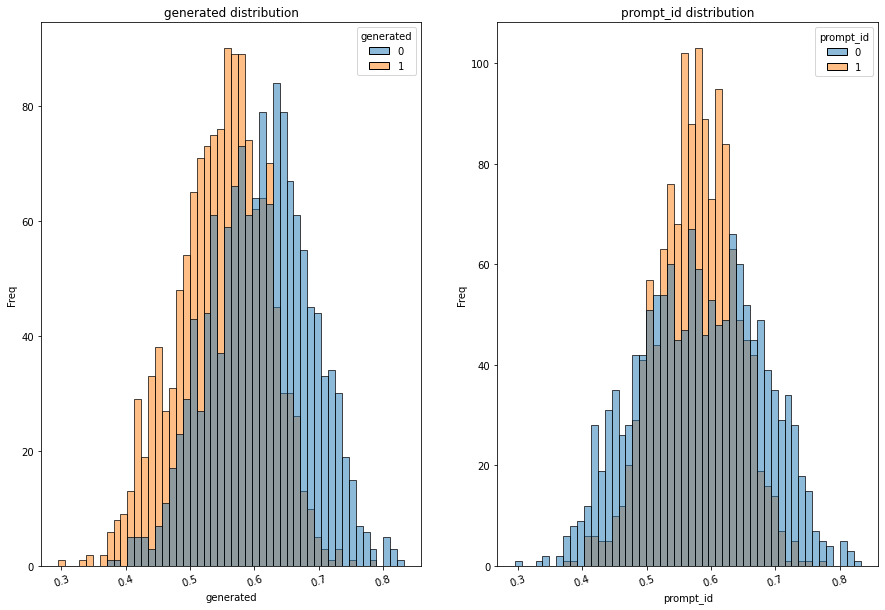

In [217]:
cols = ['generated', 'prompt_id']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
for ax, col in zip(axes.flatten(), cols):
    sns.histplot(data=df_full, x=df_full['unique_ratio'], hue=col, ax=ax, bins=50)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Freq')
    ax.tick_params(axis='x', labelrotation=20)

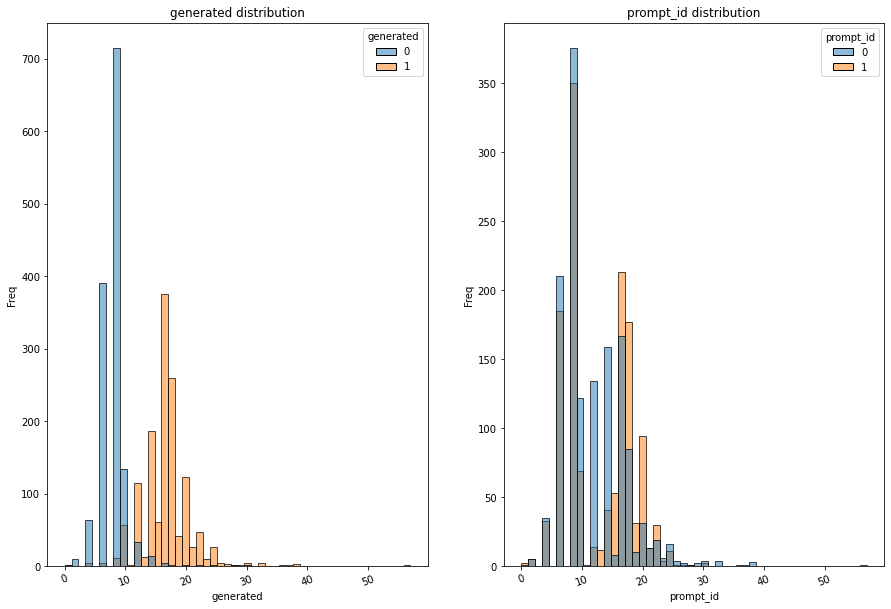

In [246]:
# PaLM makes more new lines
cols = ['generated', 'prompt_id']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
for ax, col in zip(axes.flatten(), cols):
    sns.histplot(data=df_full, x=df_full['new_lines_quant'], hue=col, ax=ax, bins=50)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Freq')
    ax.tick_params(axis='x', labelrotation=20)

In [250]:
pattern = r'\[[^]]+\]'
matches = re.findall(pattern, df_full['text'].iloc[2761])
print(matches)

['[Your Name]']


In [275]:
def brackets_pattern_quant(text):
    pattern = r'\[.*\]'
    matches = re.findall(pattern, text)
    return len(matches)

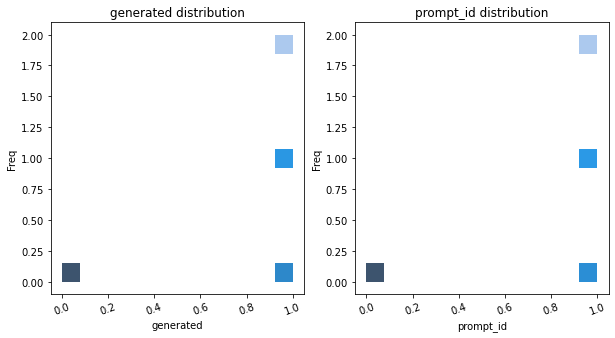

In [278]:
# pattern '[some text]' is encountered only in ai-generated text only in 'write-a-letter' domain
cols = ['generated', 'prompt_id']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for ax, col in zip(axes.flatten(), cols):
    sns.histplot(data=df_full, x=col, y=df_full['text'].apply(brackets_pattern_quant), ax=ax)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Freq')
    ax.tick_params(axis='x', labelrotation=20)